In [3]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config
import pprint
import pandas as pd

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [4]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return results

In [5]:
tracks=get_playlist_tracks('spotify','5GvoMXhmKeYvrdqKINFKaT')

In [6]:
tracks.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [7]:
tracks['items']

[{'added_at': '2020-02-03T18:23:22Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/wzcicbtqc7m13jdmkz4bb57fx'},
   'href': 'https://api.spotify.com/v1/users/wzcicbtqc7m13jdmkz4bb57fx',
   'id': 'wzcicbtqc7m13jdmkz4bb57fx',
   'type': 'user',
   'uri': 'spotify:user:wzcicbtqc7m13jdmkz4bb57fx'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5RPzPJCg4ER1LzQkorZ31p'},
      'href': 'https://api.spotify.com/v1/artists/5RPzPJCg4ER1LzQkorZ31p',
      'id': '5RPzPJCg4ER1LzQkorZ31p',
      'name': 'Worakls',
      'type': 'artist',
      'uri': 'spotify:artist:5RPzPJCg4ER1LzQkorZ31p'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/7ry8L53T4oJtSIogGYuioq'},
      'href': 'https://api.spotify.com/v1/artists/7ry8L53T4oJtSIogGYuioq',
      'id': '7ry8L53T4oJtSIogGYuioq',
      'name': 'NTO',
      'type': 'artist',
    

In [8]:
list_of_audio_features=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks['items'][0]['track']['id'][0]))

In [9]:
list_of_songs=[]
for item in tracks['items']:
    list_of_songs.append(sp.audio_features(item["track"]["id"])[0])
    
df=pd.DataFrame(list_of_songs)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930,0.0863,0.1360,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908,0.0928,0.2230,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899,0.1060,0.2610,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740,0.0682,0.2710,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882,0.1050,0.1500,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
5,0.678,0.713,-6.451,0.0487,0.001360,0.865,0.0837,0.1900,127.993,77cHi3HzlrS8XDgue2WT8y,330000
6,0.734,0.621,-11.638,0.0501,0.147000,0.942,0.1000,0.2740,116.998,0YDF7cthGHQyNu7vHYGmyb,467692
7,0.752,0.413,-9.530,0.0502,0.025000,0.906,0.1130,0.1690,115.005,76Uea9JzqkVJhMXAWHT2WW,434087
8,0.676,0.707,-9.811,0.0572,0.112000,0.916,0.0914,0.7720,124.000,7mf9chuUZHpfyysoNH3WY0,340645
9,0.756,0.404,-11.767,0.0439,0.066300,0.912,0.1010,0.1980,120.005,5G04a8o6Ta2MzLlrH4QdQN,364000


In [10]:
song_ids = df['id']

In [11]:
songs = sp.tracks(song_ids)['tracks']
for song in songs:
    print(song['name'], 'by', song['artists'][0]['name'])

Trauma - Worakls Remix by NTO
Coeur De La Nuit - Worakls Remix by Ferdinand Dreyssig
Question réponse by Worakls
Alter Ego by NTO
Carrousel - Short Version by NTO
Porto by Worakls
Charlie by NTO
Mellotron by Worakls
Adagio for Square by Worakls
Entrudo by Worakls
The Hound by NTO
Corsair by Joachim Pastor
Cloches by Worakls
Eiffel Powder by Joachim Pastor
The Morning After by NTO
Millenium by Joachim Pastor
Ariane by Joachim Pastor
Salzburg by Worakls
Eternity by Joachim Pastor
Croche by NTO
Toi by Worakls
Joda - Worakls Remix by Joachim Pastor
Nocturne by Worakls
Invisible by NTO


#another list

In [12]:
tracks2=get_playlist_tracks('spotify','37i9dQZF1DXbITWG1ZJKYt')

In [13]:
list_of_audio_features2=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features2.append(sp.audio_features(tracks['items'][0]["track"]["id"][0]))

In [14]:
list_of_songs2=[]
for item in tracks2['items']:
    list_of_songs2.append(sp.audio_features(item["track"]["id"])[0])
    
df2=pd.DataFrame(list_of_songs2)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.503,0.3440,-19.024,0.0369,0.6730,0.381000,0.0960,0.468,108.489,0m8tSPLHhjhGToD6LW0RPp,191933
1,0.437,0.0857,-18.129,0.0384,0.8400,0.641000,0.0898,0.206,73.161,5uNtaTmigAubx5fLfO92AW,259413
2,0.503,0.3400,-9.034,0.0374,0.6940,0.000000,0.1020,0.651,142.830,7hvZ6vMAnO0cDkkKKJok4Y,412653
3,0.585,0.3750,-12.171,0.0504,0.7800,0.003650,0.0806,0.665,72.590,5wcAcShxT5qvLJvuM6jkZt,367400
4,0.529,0.0367,-21.630,0.0515,0.9900,0.310000,0.1270,0.214,140.296,10El9hxviSBm7pChWxG1ib,330693
5,0.571,0.2930,-11.914,0.0385,0.8280,0.179000,0.1120,0.230,82.745,57B6gMEI1E4E3kKLKvfX3U,480000
6,0.500,0.2080,-14.235,0.0743,0.7690,0.496000,0.3720,0.461,180.852,4F0sSQCicLl5tme407ubvS,282667
7,0.552,0.5090,-9.828,0.0428,0.6050,0.509000,0.0827,0.740,112.049,05LNBtMuc26HSAHh7C6iG8,407600
8,0.579,0.5660,-8.733,0.0531,0.7540,0.538000,0.0987,0.830,125.031,3k7MPapSDy9kSWuhvXxP3c,281987
9,0.521,0.0995,-17.071,0.0372,0.9870,0.944000,0.1090,0.227,63.155,13hLjPatKentvawsFceF9a,338733


In [15]:
song_ids2 = df2['id']

songs2 = sp.tracks(song_ids2)['tracks']

# Print the song names and artists
for song in songs2:
    print(song['name'], 'by', song['artists'][0]['name'])

Windows by Chick Corea
For Lena And Lennie by Quincy Jones
Too Close For Comfort by Jutta Hipp
My Groove Your Move - Rudy Van Gelder Edition by Hank Mobley
How Long Has This Been Going On by Ben Webster
Yams by Jackie McLean
Until The Real Thing Comes Along by Coleman Hawkins
St. Thomas by Sonny Rollins
Hoe Down by Oliver Nelson
Danny's Dream by Lars Gullin
Quick Trick by Art Blakey & The Jazz Messengers
My Sin - Remastered 2000/Rudy Van Gelder Edition by Hank Mobley
Senor Mouse by Gary Burton
I Remember You by Lee Konitz
Tenor Madness - Rudy Van Gelder Remaster by Sonny Rollins Quartet
502 Blues (Drinkin' And Drivin') - Rudy Van Gelder Edition/2000 Digital Remaster/24 Bit Mastering by Wayne Shorter
Conference Of The Birds by Dave Holland Quartet
Honeysuckle Rose by Anita O'Day
Fair Weather - Remastered by Art Farmer
Solitude by Sonny Rollins
Lover Man - Remastered 2006/Rudy Van Gelder Edition by Johnny Griffin
Koko - Original Take 2 by Charlie Parker
Alone Together by Sonny Stitt
Main

In [16]:
tracks3=get_playlist_tracks('spotify','37i9dQZF1DZ06evO2Ufkkg')

In [17]:
list_of_audio_features3=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features3.append(sp.audio_features(tracks['items'][0]["track"]["id"][0]))

In [18]:
list_of_songs3=[]
for item in tracks3['items'][:50]:
    list_of_songs3.append(sp.audio_features(item["track"]["id"])[0])
    
df3=pd.DataFrame(list_of_songs3)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.786,0.887,-5.885,0.4420,0.1530,0.000013,0.1830,0.650,130.451,4MDOHb7HrAF8d0TOGPQRI1,137296
1,0.686,0.676,-6.503,0.3610,0.0116,0.000000,0.1730,0.206,123.352,5pjVUG4PRdUsMN1OTkVOsk,211712
2,0.750,0.662,-6.142,0.2390,0.5600,0.000000,0.1330,0.533,123.949,50mQStZYV5QFgyGK9GOVZg,263647
3,0.767,0.558,-6.638,0.2200,0.4710,0.000000,0.0653,0.325,110.573,1EbdQ54jFLGEH94cUif3TI,174680
4,0.704,0.722,-5.636,0.1850,0.2350,0.000000,0.2010,0.526,143.983,1XZAvmc3wxxbOf79pgHLh4,150625
5,0.744,0.574,-8.108,0.3090,0.5530,0.000008,0.3650,0.624,75.587,2aS1Hr5Yirja8gYge1wmTZ,156668
6,0.843,0.760,-6.340,0.3740,0.0795,0.000000,0.3110,0.686,98.091,0fNKwCjU3ymvLr9dWi5zzI,160394
7,0.480,0.749,-5.057,0.4320,0.5330,0.000000,0.0997,0.419,179.056,67ojvEGRPAUCOohuMPqoRC,194534
8,0.656,0.756,-4.026,0.3000,0.4350,0.000000,0.0934,0.645,168.031,2kkcJ8tSDV42LdWcPjy6We,188057
9,0.698,0.733,-5.251,0.0905,0.1480,0.000000,0.1330,0.703,180.070,6kxErsVgalFeBlxRfHCuUv,151563


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   loudness          50 non-null     float64
 3   speechiness       50 non-null     float64
 4   acousticness      50 non-null     float64
 5   instrumentalness  50 non-null     float64
 6   liveness          50 non-null     float64
 7   valence           50 non-null     float64
 8   tempo             50 non-null     float64
 9   id                50 non-null     object 
 10  duration_ms       50 non-null     int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 4.4+ KB


In [20]:
song_ids3 = df3['id']

songs3 = sp.tracks(song_ids3)['tracks']

# Print the song names and artists
for song in songs3:
    print(song['name'], 'by', song['artists'][0]['name'])

Wesh Bira by Capital Bra
Bra Musik by Capital Bra
Neymar by Capital Bra
7 Stunden by LEA
Ale Ale by Capital Bra
Hundert Jahre Eiszeit by Capital Bra
Belly Dance by Capital Bra
110 by Capital Bra
Wieder Lila by Samra
BLESSED (feat. Capital Bra) by CRO
El Naseeni by Capital Bra
Tilidin by Capital Bra
BERETTA by Farid Bang
Discokugel by Gustav
Viva la Dealer by SDP
One Night Stand by Capital Bra
Melodien by Capital Bra
Bentley in weiss by Capital Bra
Cherry Lady by Capital Bra
Diamonds (feat. Capital Bra) by Summer Cem
AK47 by Capital Bra
Andere Welt by Capital Bra
Sommer by Beatzarre & Djorkaeff
Frühstück in Paris by Capital Bra
Berlin lebt by Capital Bra
VIJA VIJA by DJ Gimi-O
Giuseppe Zanotti by Capital Bra
Purple Rain by Capital Bra
Ein Jahr (feat. Montez) by Capital Bra
Benzema by Capital Bra
5 Songs in einer Nacht by Capital Bra
Lieber Gott by Capital Bra
UUU (feat. Capital Bra) by Noah
Olé Olé by Capital Bra
Prinzessa by Capital Bra
0Uhr26 by Capital Bra
DNA by KC Rebell
Royal Rumb

In [21]:
all_df = pd.concat([df,df2,df3])
all_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
...,...,...,...,...,...,...,...,...,...,...,...
45,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092,1JPd9BSiiN7xrKE64Qo30m,171147
46,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,5XL8t0sfvBdwdH7RrHQMtv,92933
47,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025,3qbIqM093hzlcTtgjWef0K,178640
48,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092,3A2a0y5rcJWhm1GJq04tuV,155427


In [22]:
sp.available_markets()

{'markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'ET',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'JP',
  'KE',
  'KG',
  'KH',
  'KI',
  'KM',
  'KN',
  'KR',
  'KW',
  'KZ',
  'LA',
  'LB',
  'LC',
  'LI',
  'LK',
  'LR',
  'LS',
  'LT',
  'LU',
  'LV',
  'LY',
  'MA',
  'MC',
  'MD',
  'ME',
  'MG',
  'MH',
  'MK',
  'ML',
  'MN',
  'MO',
  'MR',
  'MT',
  'MU',
  'MV',
  'MW',
  'MX',
  'MY',
  'MZ',
  'NA',
  'NE',
  'NG',
  'NI

In [23]:
len(all_df)

124

In [24]:
all_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [25]:
#all_df = all_df.set_index('id', inplace= True)  didnt work well, losing data, will use another method

In [26]:
all_df  #from above code

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
...,...,...,...,...,...,...,...,...,...,...,...
45,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092,1JPd9BSiiN7xrKE64Qo30m,171147
46,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,5XL8t0sfvBdwdH7RrHQMtv,92933
47,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025,3qbIqM093hzlcTtgjWef0K,178640
48,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092,3A2a0y5rcJWhm1GJq04tuV,155427


In [27]:
all_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
...,...,...,...,...,...,...,...,...,...,...,...
45,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092,1JPd9BSiiN7xrKE64Qo30m,171147
46,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,5XL8t0sfvBdwdH7RrHQMtv,92933
47,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025,3qbIqM093hzlcTtgjWef0K,178640
48,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092,3A2a0y5rcJWhm1GJq04tuV,155427


In [28]:
#other method

cols = all_df.columns.tolist()
cols = cols[-2:] + cols[:-2]


In [29]:
all_df = all_df[cols] 

In [30]:
all_df  #so moved the id front, I will use it below as index

,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034
...,...,...,...,...,...,...,...,...,...,...,...
45,1JPd9BSiiN7xrKE64Qo30m,171147,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092
46,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006
47,3qbIqM093hzlcTtgjWef0K,178640,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025
48,3A2a0y5rcJWhm1GJq04tuV,155427,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092


In [31]:
all_df.isna().sum()

id                  0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Save the ID column you don't want to scale
not_scaled = all_df['id']

# Drop the ID column and scale the remaining columns
scaled_cols = scaler.fit_transform(all_df.drop(columns=['id']))
#scaled_cols = scaler.fit_transform(all_df)

# Create a new dataframe with the scaled columns and the ID column
#df_scaled = pd.DataFrame(scaled_cols, columns=all_df.columns)
df_scaled = pd.DataFrame(scaled_cols, not_scaled, columns=all_df.columns[1:])
df_scaled


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,
1uXUZfJykefWuwj9VtyxIq,2.323272,1.081398,-0.137428,-0.105413,-0.699259,0.411765,1.780141,-0.582243,-1.452681,0.446899
5dayqPrW7a4b2Skq3EcxWK,2.023271,1.217312,-0.598135,-0.412357,-0.654797,-1.283909,1.720452,-0.519632,-1.008592,0.306626
5bsqVWz1HriB7VTkUyPHRC,0.575683,1.115376,0.090644,-0.529542,-0.438355,-1.289146,1.696034,-0.392486,-0.814621,0.377060
18MlLrfCkYOnKutil99GwY,1.160160,0.517352,0.090644,0.141551,-0.596911,-1.268487,1.264647,-0.756587,-0.763577,0.271846
5WL6VbqrAs7qYsMkCvShoN,-0.241074,0.150383,-0.388308,-0.540428,-0.675770,-1.164329,1.649911,-0.402118,-1.381219,0.202952
...,...,...,...,...,...,...,...,...,...,...
1JPd9BSiiN7xrKE64Qo30m,-0.890674,0.666858,0.875213,1.099524,1.457601,-0.499726,-0.743064,0.137292,0.614633,-1.229588
5XL8t0sfvBdwdH7RrHQMtv,-1.476665,1.489141,0.638018,0.513598,1.575050,-0.523871,-0.743006,-0.616919,-0.278651,0.516878
3qbIqM093hzlcTtgjWef0K,-0.834535,0.143587,0.665387,0.776358,0.274726,-1.111511,-0.738750,-0.469544,-0.319487,-0.847048


In [33]:
df_scaled

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,
1uXUZfJykefWuwj9VtyxIq,2.323272,1.081398,-0.137428,-0.105413,-0.699259,0.411765,1.780141,-0.582243,-1.452681,0.446899
5dayqPrW7a4b2Skq3EcxWK,2.023271,1.217312,-0.598135,-0.412357,-0.654797,-1.283909,1.720452,-0.519632,-1.008592,0.306626
5bsqVWz1HriB7VTkUyPHRC,0.575683,1.115376,0.090644,-0.529542,-0.438355,-1.289146,1.696034,-0.392486,-0.814621,0.377060
18MlLrfCkYOnKutil99GwY,1.160160,0.517352,0.090644,0.141551,-0.596911,-1.268487,1.264647,-0.756587,-0.763577,0.271846
5WL6VbqrAs7qYsMkCvShoN,-0.241074,0.150383,-0.388308,-0.540428,-0.675770,-1.164329,1.649911,-0.402118,-1.381219,0.202952
...,...,...,...,...,...,...,...,...,...,...
1JPd9BSiiN7xrKE64Qo30m,-0.890674,0.666858,0.875213,1.099524,1.457601,-0.499726,-0.743064,0.137292,0.614633,-1.229588
5XL8t0sfvBdwdH7RrHQMtv,-1.476665,1.489141,0.638018,0.513598,1.575050,-0.523871,-0.743006,-0.616919,-0.278651,0.516878
3qbIqM093hzlcTtgjWef0K,-0.834535,0.143587,0.665387,0.776358,0.274726,-1.111511,-0.738750,-0.469544,-0.319487,-0.847048


In [34]:
for item in df_scaled:
    if item is None:
        print("Found a None value")
    else:
        print('clean')

clean
clean
clean
clean
clean
clean
clean
clean
clean
clean


In [36]:
#pip install --upgrade threadpoolctl

In [37]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

pyflakes                      2.4.0
Pygments                      2.11.2
PyHamcrest                    2.0.2
PyJWT                         2.4.0
pylint                        2.14.5
pyls-spyder                   0.4.0
pyobjc-core                   8.5
pyobjc-framework-Cocoa        8.5
pyobjc-framework-CoreServices 8.5
pyobjc-framework-FSEvents     8.5
pyodbc                        4.0.34
pyOpenSSL                     22.0.0
pyparsing                     3.0.9
PyQt5-sip                     12.11.0
pyrsistent                    0.18.0
PySocks                       1.7.1
pytest                        7.1.2
python-dateutil               2.8.2
python-lsp-black              1.2.1
python-lsp-jsonrpc            1.0.0
python-lsp-server             1.5.0
python-slugify                5.0.2
python-snappy                 0.6.0
pytz                          2022.1
pyviz-comms                   2.0.2
PyWavelets                    1.3.0
PyYAML                        6.0
pyzmq                         

Training a K-Means model with 2 clusters! 



/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 



/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 



/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

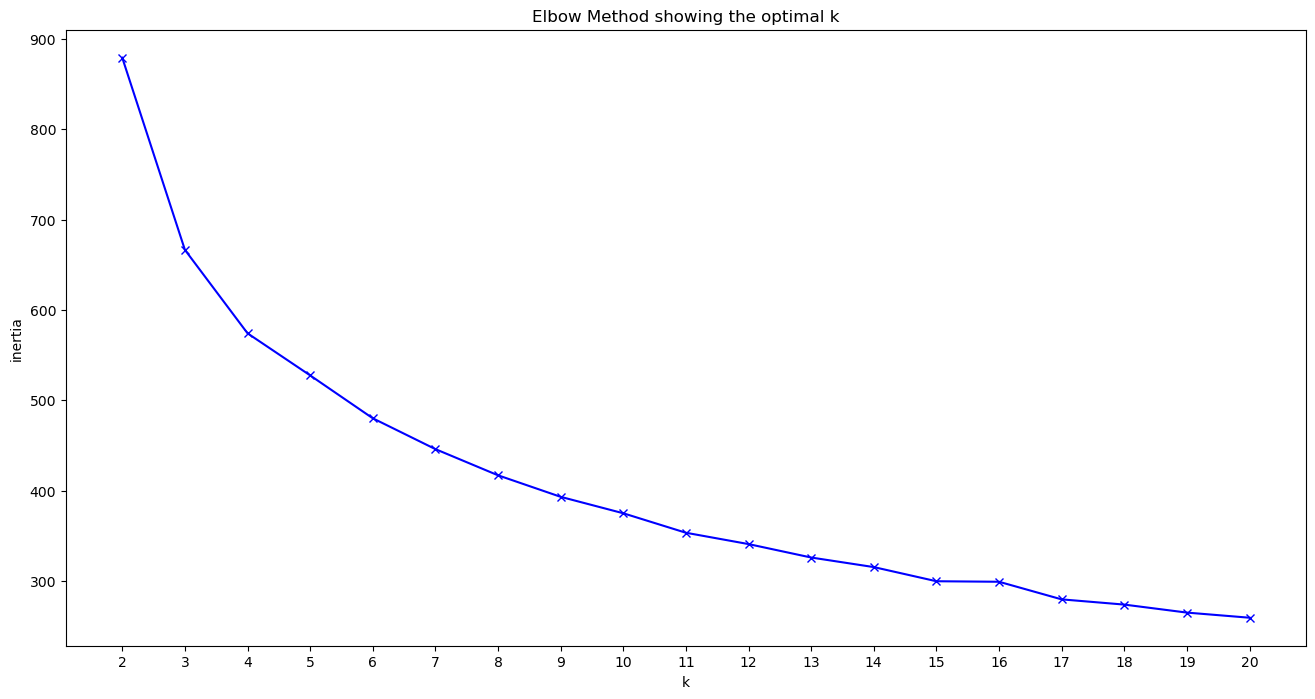

In [38]:
from sklearn.cluster import KMeans
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [39]:
#elbow shows 3 or 4, I will check silhouette

/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

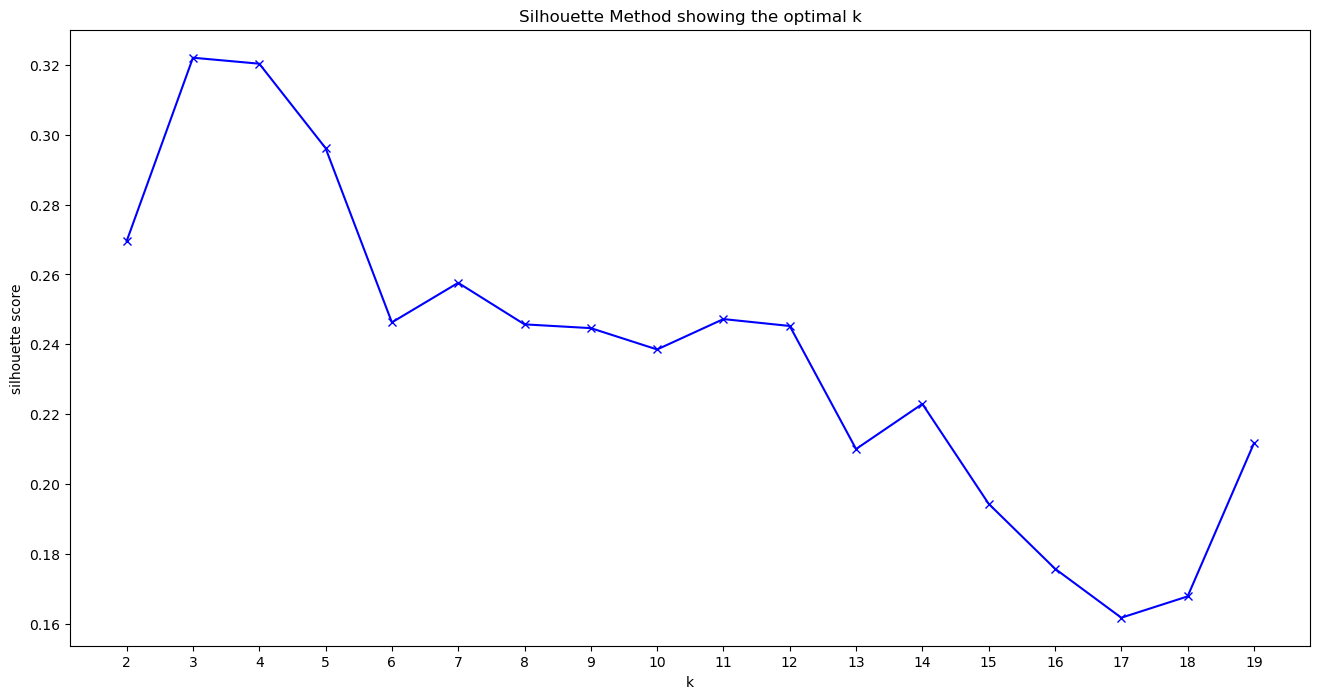

In [40]:
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

import os

if not os.path.exists('Model'):
    os.makedirs('Model')


K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(df_scaled)
    
    filename = "Model.pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df_scaled, kmeans.predict(df_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [41]:
#pip list

In [42]:
#pip install --upgrade scikit-learn

In [43]:
#all_df = all_df.drop(columns=['id'])

In [ ]:
#Silhouette show 3 

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [45]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

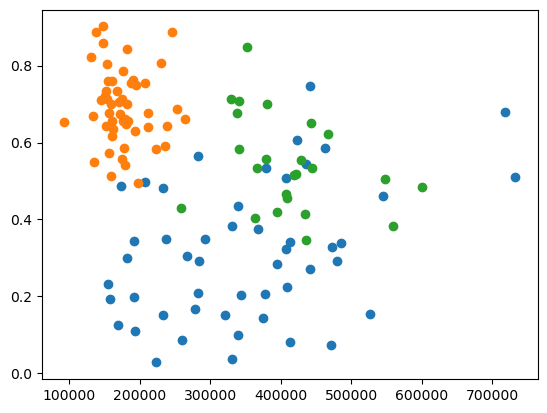

In [46]:
labels = kmeans.predict(df_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(all_df.to_numpy()[row_ix, 1], all_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [47]:
clusters = kmeans.predict(df_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    49
1    51
2    24
dtype: int64

In [48]:
all_df["cluster"] = clusters
all_df

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_97022/496762211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["cluster"] = clusters


,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2
...,...,...,...,...,...,...,...,...,...,...,...,...
45,1JPd9BSiiN7xrKE64Qo30m,171147,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092,1
46,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,1
47,3qbIqM093hzlcTtgjWef0K,178640,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025,1
48,3A2a0y5rcJWhm1GJq04tuV,155427,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092,1


In [55]:
#returning the id of the song, I want the name

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# set up Spotify API credentials
#client_id = "your_client_id"
#client_secret = "your_client_secret"
#client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# load your dataframe with song ids and audio features
#df = pd.read_csv("your_dataframe.csv")

# scale your audio features
#scaler = StandardScaler()
scaled_features = df_scaled #scaler.fit_transform(df.iloc[:, 1:-1])

# fit KMeans clustering model with k=3
#kmeans = KMeans(n_clusters=3, random_state=1234)
#kmeans.fit(scaled_features)

# define function to recommend songs from the same cluster
def recommend_song(song_name):
    # search for the song on Spotify
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        # get audio features of the song
        song_id = results['tracks']['items'][0]['id']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        # predict the cluster of the song
        cluster = kmeans.predict(scaled_audio_features)[0]
        # get the list of songs from the same cluster
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        # choose a random song from the same cluster
        recommended_song = np.random.choice(songs_in_cluster)
        return recommended_song
    
# test the recommend_song function
song_name = input("Please enter a song name: ")
print("We recommend:", recommend_song(song_name))



Please enter a song name: nocturne
We recommend: 5bsqVWz1HriB7VTkUyPHRC


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [57]:
id_list = all_df['id']

# initialize an empty list to store song names
song_names = []

# loop through the song ids and get the corresponding song names using the Spotify API
for song_id in id_list:
    track_info = sp.track(song_id)
    song_name = track_info['name']
    song_names.append(song_name)

# add a new column to the dataframe with the song names
all_df['name'] = song_names
all_df

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_97022/2850968275.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['name'] = song_names


,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,name
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2,Trauma - Worakls Remix
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2,Coeur De La Nuit - Worakls Remix
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2,Question réponse
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2,Alter Ego
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2,Carrousel - Short Version
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1JPd9BSiiN7xrKE64Qo30m,171147,0.738,0.706,-4.839,0.2980,0.262000,0.000000,0.1610,0.541,80.092,1,Einsam an der Spitze
46,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,1,Intro
47,3qbIqM093hzlcTtgjWef0K,178640,0.661,0.660,-6.353,0.1570,0.059300,0.001590,0.0980,0.358,91.025,1,Musik
48,3A2a0y5rcJWhm1GJq04tuV,155427,0.626,0.760,-4.926,0.3770,0.065400,0.000009,0.0697,0.407,99.092,1,Die Echten


In [60]:
all_df['name'] = song_names

# function to get song name from id
def get_song_name(song_id):
    return all_df[all_df['id'] == song_id]['name'].iloc[0]

# function to recommend a song based on input song name
def recommend_song(song_name):
    # find the cluster of the input song
    input_song = all_df[all_df['name'] == song_name]
    input_cluster = kmeans.predict(scaler.transform(input_song.iloc[:, :-2]))[0]
    
    # find a song in the same cluster that is not the input song
    cluster_songs = all_df[all_df['cluster'] == input_cluster]
    cluster_songs = cluster_songs[cluster_songs['name'] != song_name]
    recommended_song_id = cluster_songs.sample()['id'].values[0]
    
    # get the name of the recommended song and return it
    recommended_song_name = get_song_name(recommended_song_id)
    print(recommended_song_name)

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_97022/2987046105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['name'] = song_names


In [62]:
#recommending the name from given spotify lists

def recommend_song(song_name):
    # search for the song on Spotify
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        # get audio features of the song
        song_id = results['tracks']['items'][0]['id']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        # predict the cluster of the song
        cluster = kmeans.predict(scaled_audio_features)[0]
        # get the list of songs from the same cluster
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['name']
        # choose a random song from the same cluster
        recommended_song = np.random.choice(songs_in_cluster)
        return recommended_song
    
# test the recommend_song function
song_name = input("Please enter a song name: ")
print("We recommend:", recommend_song(song_name))

Please enter a song name: nocturne
We recommend: Alter Ego


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [63]:
#Now I am going to recommend songs from top 100 of the Billboard.com via scraping based on your spotify list

In [65]:
from bs4 import BeautifulSoup
import requests
import pprint as pp

In [66]:
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)

In [67]:
response.status_code

200

In [68]:
soup = BeautifulSoup(response.content, "html.parser")

In [69]:
result = soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max")

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
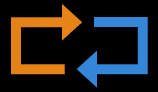

In [70]:
soup

In [ ]:
#result = soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max")

In [ ]:
song_info = []

for title in soup.select("#post-1479786 > div.charts-top-featured.\/\/.lrv-a-wrapper.lrv-u-padding-lr-00\@mobile-max.u-padding-b-350\@tablet.u-padding-b-250 > div > div.a-span2.lrv-u-padding-r-2.lrv-u-padding-r-00\@mobile-max.lrv-u-height-100p > div.lrv-u-flex.lrv-u-justify-content-space-between.lrv-u-margin-b-2.lrv-u-margin-b-00\@mobile-max.u-background-color-black\@mobile-max.u-color-white\@mobile-max.lrv-u-padding-lr-125\@mobile-max"):
    song_info.append(title.get_text("/", strip=True))

In [ ]:
top100_list = soup.select("#title-of-a-story.c-title.a-no-trucate")
top100_list